# Predicting the Winning Football Team

<img src="https://gmsrp.cachefly.net/images/19/12/24/69e8a962026a073b7adc0340f3a5c722/960.jpg" alt="Drawing" style="width: 500px;"/>



## Steps

1. We will clean our dataset
2. Split it into training and testing data (12 features & 1 target (winning team (Home/not Home))
3. Train 6 different classifiers on the data 
  
  
4. Use the best Classifer to predict who will win given an away team and a home team


## Dataset

- Football is played by 250 million players in over 200 countries (most popular sport globally)
- The English Premier League is the most popular domestic team in the world
- Retrived dataset from "Football-data"

## Attributes of Dataset
- FTR:Full time result
- HTP:Home team points
- ATP: Away team points
- HM1/HM2/HM3- Home team last 3 matches
- AM1/AM2/AM3- Away team last 3 matches
- HTGD-Half time goal difference
- FTGD-Full time goal difference
- FTAH-Full time home goal
- FTAG-Full time away goal
- Difformpnts- Difference of form points between two teams






## Import Dependencies

In [4]:
#data preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline


In [5]:
# Read data and drop redundant column.
df = pd.read_csv('dataset.csv')



In [6]:
df.head(10)


,HomeTeam,AwayTeam,Date,FTHG,FTAG,FTR,Year,FTR1,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,Charlton,Man City,19-08-2000,4,0,H,2000,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,0
1,Chelsea,West Ham,19-08-2000,4,2,H,2000,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,-4
2,Coventry,Middlesbrough,19-08-2000,1,3,NH,2000,A,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,2
3,Derby,Southampton,19-08-2000,2,2,NH,2000,D,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,1
4,Leeds,Everton,19-08-2000,2,0,H,2000,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,-10
5,Leicester,Aston Villa,19-08-2000,0,0,NH,2000,D,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,2
6,Liverpool,Bradford,19-08-2000,1,0,H,2000,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,-13
7,Sunderland,Arsenal,19-08-2000,1,0,H,2000,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,5
8,Tottenham,Ipswich,19-08-2000,3,1,H,2000,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,-8
9,Man United,Newcastle,20-08-2000,2,0,H,2000,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,-10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 20 columns):
HomeTeam       6080 non-null object
AwayTeam       6080 non-null object
Date           6080 non-null object
FTHG           6080 non-null int64
FTAG           6080 non-null int64
FTR            6080 non-null object
Year           6080 non-null int64
FTR1           6080 non-null object
HTP            6080 non-null float64
ATP            6080 non-null float64
HM1            6080 non-null object
HM2            6080 non-null object
HM3            6080 non-null object
AM1            6080 non-null object
AM2            6080 non-null object
AM3            6080 non-null object
HTGD           6080 non-null float64
ATGD           6080 non-null float64
DiffFormPts    6080 non-null float64
DiffLP         6080 non-null int64
dtypes: float64(5), int64(4), object(11)
memory usage: 950.1+ KB


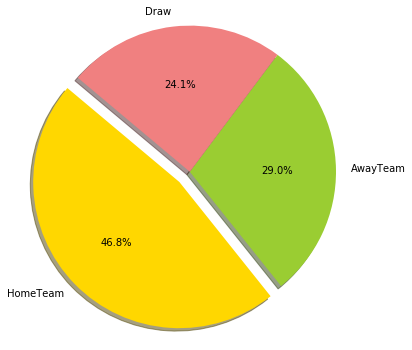

In [8]:
labels = 'HomeTeam', 'AwayTeam','Draw'
sizes = [46.32,28.72,23.86]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
fig = plt.gcf()
fig.set_size_inches(6,6)

plt.axis('equal')
plt.show()

In [9]:
df.groupby('Year')['FTHG'].sum()

Year
2000    340
2001    530
2002    578
2003    539
2004    592
2005    544
2006    582
2007    576
2008    535
2009    602
2010    595
2011    615
2012    631
2013    569
2014    583
2015    551
2016    297
Name: FTHG, dtype: int64

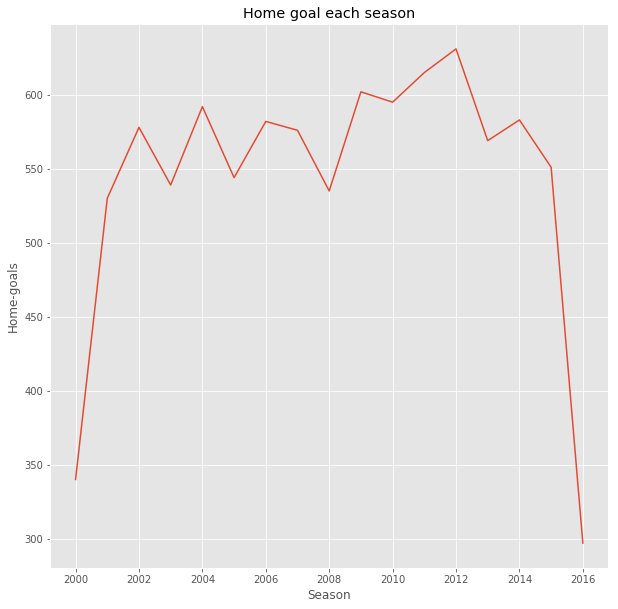

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.title('Home goal each season')
plt.xlabel('Season')
plt.ylabel('Home-goals')
plt.plot(df.groupby('Year')['FTHG'].sum())

In [71]:
df.groupby('Year')['FTHG'].sum().values/df.groupby('Year')['FTAG'].sum().values

array([1.61137441, 1.22969838, 1.37292162, 1.26229508, 1.3010989 ,
       1.41666667, 1.54376658, 1.38129496, 1.24418605, 1.505     ,
       1.50632911, 1.3029661 , 1.34541578, 1.30504587, 1.28982301,
       1.29342723, 1.26382979])

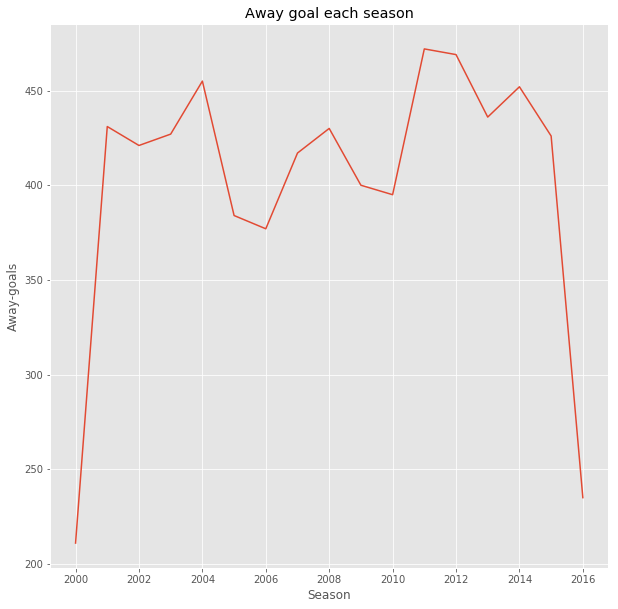

In [12]:
fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.title('Away goal each season')
plt.xlabel('Season')
plt.ylabel('Away-goals')
plt.plot(df.groupby('Year')['FTAG'].sum())


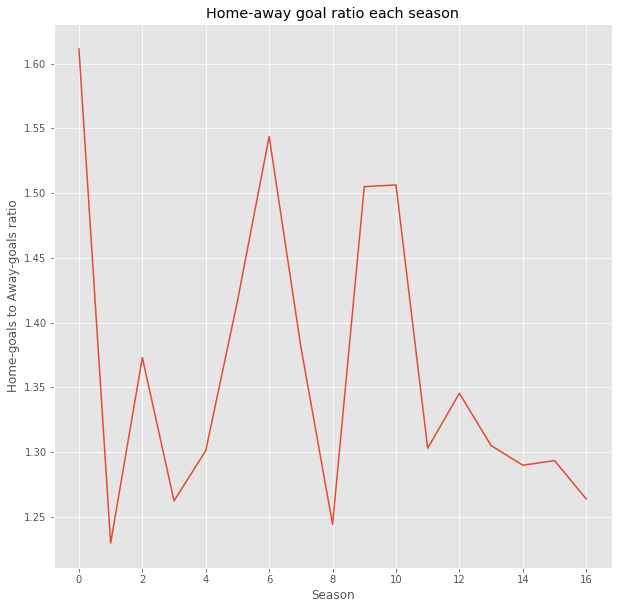

In [72]:
fig = plt.figure(figsize=(10, 10))

plt.style.use('ggplot')
plt.title('Home-away goal ratio each season')
plt.xlabel('Season')
plt.ylabel('Home-goals to Away-goals ratio')
plt.plot(df.groupby('Year')['FTHG'].sum().values/df.groupby('Year')['FTAG'].sum().values)


Text(0.5, 0, 'Team name')

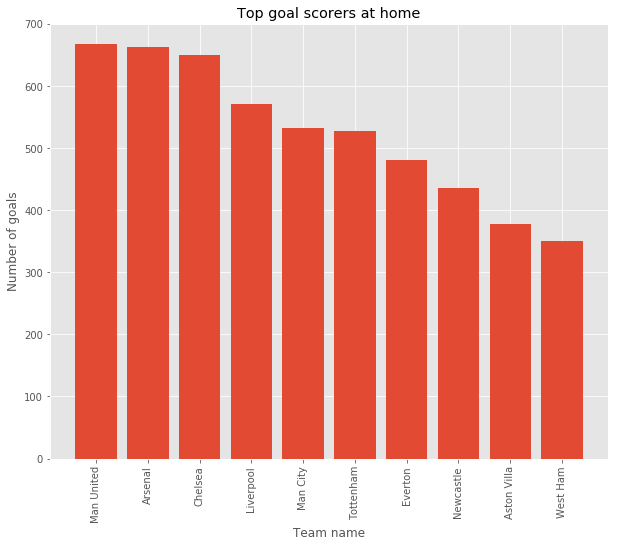

In [13]:
x=df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending = False)
x.head(10)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(10), df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending = False).head(10),align = "center")
ax.set_xticks(range(10))
ax.set_xticklabels(x.head(10).index,rotation = "vertical")
ax.set_title("Top goal scorers at home")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

Text(0.5, 0, 'Team name')

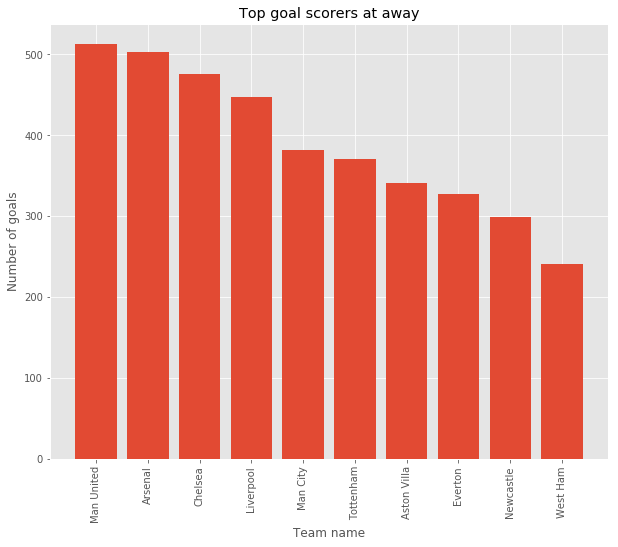

In [14]:
x1=df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending = False)
x1.head(10)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(10), df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending = False).head(10),align = "center")
ax.set_xticks(range(10))
ax.set_xticklabels(x1.head(10).index,rotation = "vertical")
ax.set_title("Top goal scorers at away")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

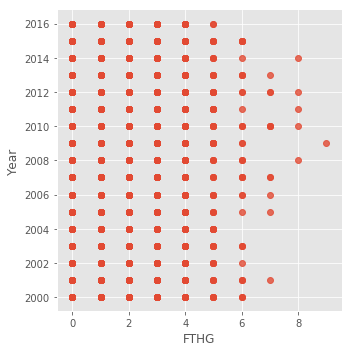

In [15]:
sns.lmplot(x='FTHG', y='Year', fit_reg=False, data=df);

## Data Exploration

In [16]:
data=df.drop(['HomeTeam', 'AwayTeam','FTHG','FTAG','Date','Year','FTR1'], axis=1)
data.head()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,0
1,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,-4
2,NH,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,2
3,NH,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,1
4,H,0.0,0.0,W,W,W,W,W,W,0.0,0.0,0.0,-10


In [17]:
#what is the win rate for the home team?

n_matches = data.shape[0]


n_features = data.shape[1] - 1
n_homewins = len(data[data.FTR == 'H'])


win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {} ".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6080 
Number of features: 12
Number of matches won by home team: 2816
Win rate of home team: 46.32%


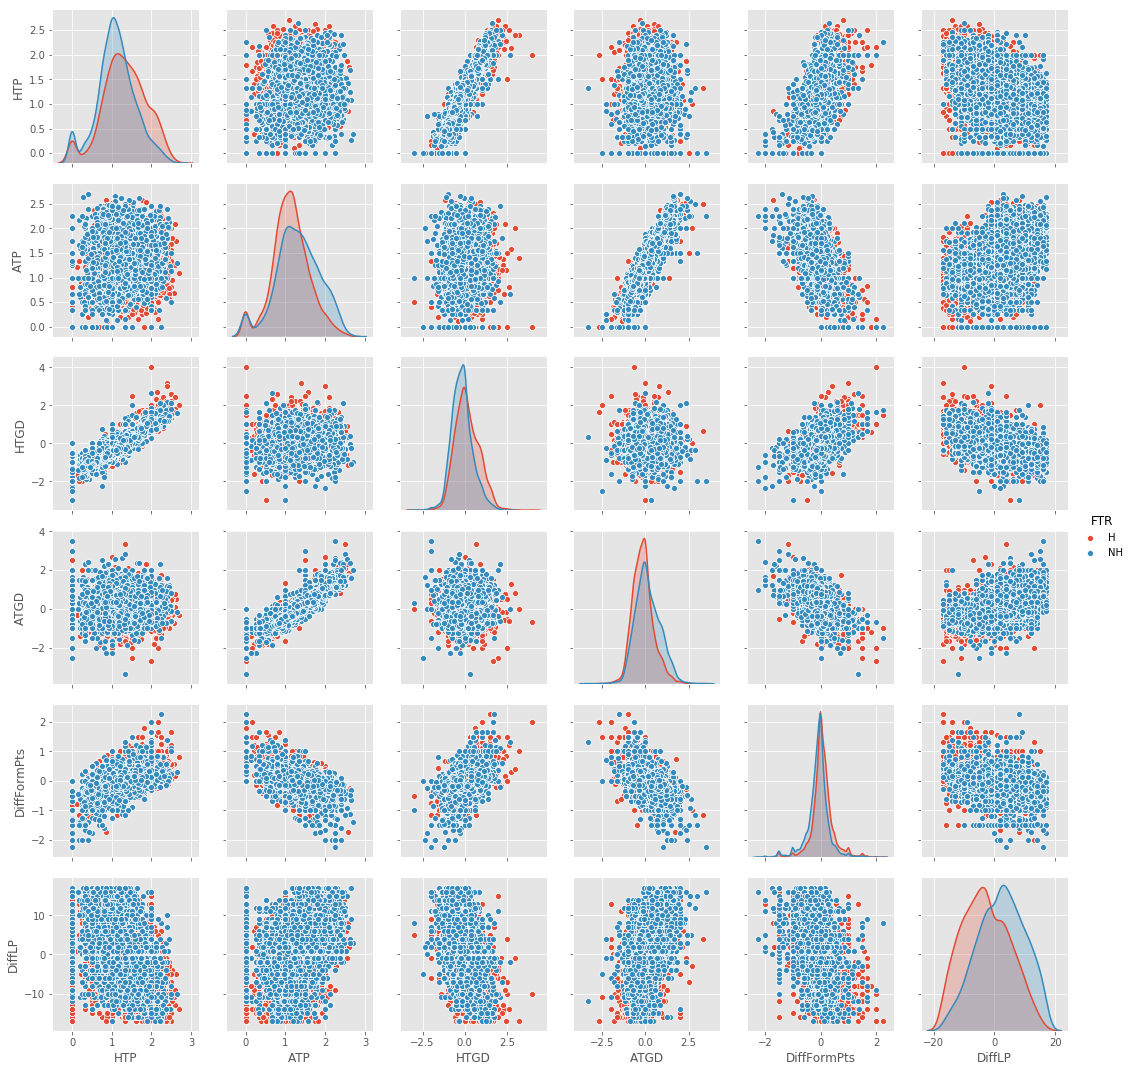

In [78]:
sns.pairplot(data,hue='FTR')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AD16F39B0>,
      dtype=object)

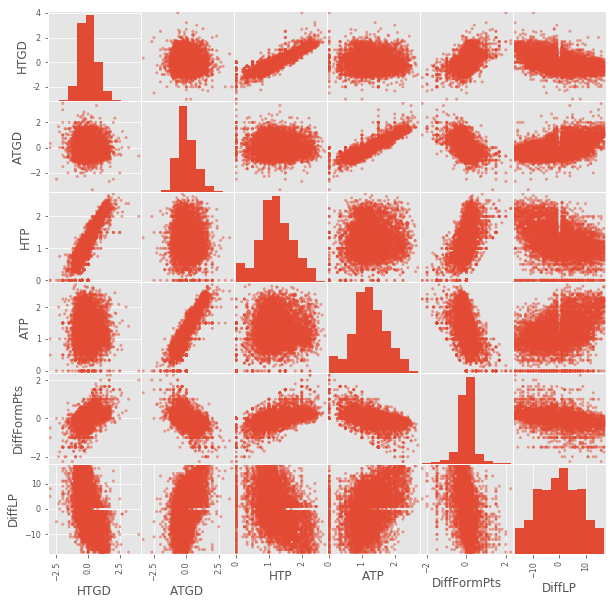

In [18]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

plt.style.use('ggplot')
scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))

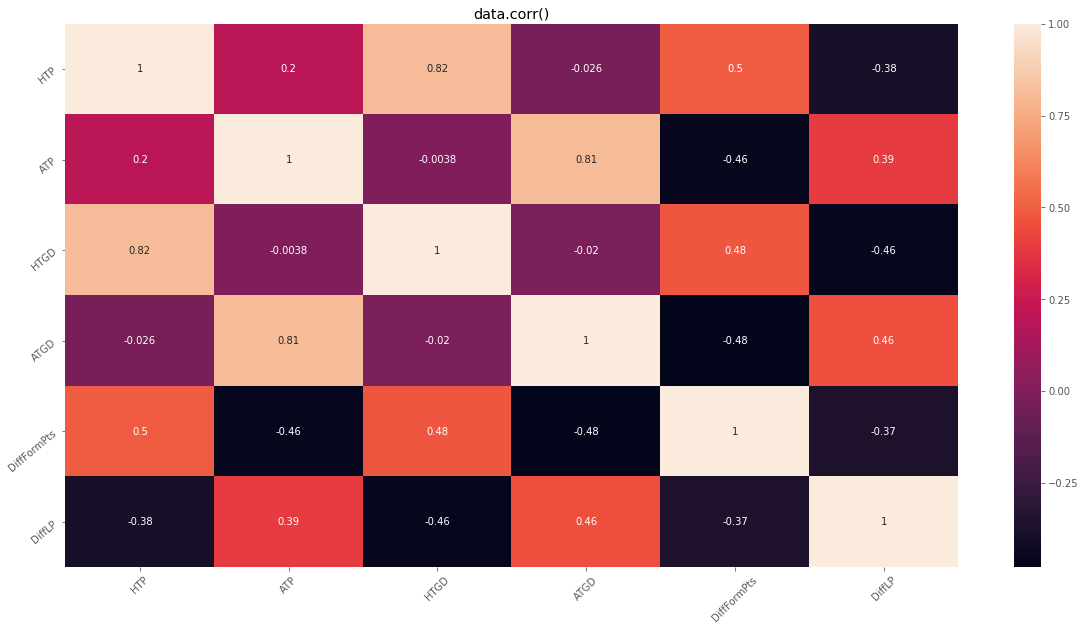

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.title('data.corr()')
plt.xticks(rotation=45)
plt.yticks(rotation=40)
plt.show()

## Preparing the Data

In [20]:
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])

E:\Conda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


In [21]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

In [22]:



def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
  
    output = pd.DataFrame(index = X.index)

  
    for col, col_data in X.iteritems():

 
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (24 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [23]:
print ("\nFeature values:")
display(X_all.head(15))


Feature values:


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
0,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,0.000000
1,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,-0.496101
2,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,0.248051
3,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,0.124025
4,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,-1.240253
5,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,0.248051
6,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,-1.612329
7,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,0.620127
8,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,-0.992203
9,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.0,-1.240253


In [50]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)


In [25]:
X_train

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
5630,-0.753982,1.437685,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,-1.044013,1.361323,-0.343750,1.736354
690,1.629523,-0.256009,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1.442279,-0.668891,0.343750,-0.620127
386,-2.303259,-2.373125,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.014963,-0.022914,0.000000,0.248051
1446,0.526191,-0.437476,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.537768,-0.308692,0.129032,-0.124025
1816,-0.269336,0.078698,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,-0.279709,-0.170566,-0.033333,0.496101
2018,0.715846,-0.760084,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0.506082,-0.269001,0.583333,-1.364279
5331,0.556946,-1.405301,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,1.488321,-0.022914,1.000000,-1.860380
2395,-0.873157,0.852957,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,-1.090056,0.100129,-0.166667,1.240253
3638,1.857039,0.530349,0,0,1,0,0,1,1,0,...,0,0,1,1,0,0,2.291971,0.111315,0.090909,-1.860380
5446,-0.396456,0.158109,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,-0.438378,0.544978,-0.153846,1.612329


In [26]:
y_train

5630    NH
690      H
386      H
1446     H
1816     H
2018     H
5331     H
2395    NH
3638     H
5446    NH
1250     H
2670    NH
870      H
5434     H
4650     H
3592     H
489     NH
432      H
3705    NH
237      H
5034     H
2952    NH
496      H
4876     H
228     NH
2973     H
4684     H
5538     H
5047     H
5021    NH
        ..
5053    NH
1197     H
3004    NH
5165     H
1458     H
1605     H
2149     H
4887    NH
5686    NH
3673    NH
2189    NH
105      H
3469     H
1218    NH
991     NH
1602     H
4378     H
1861     H
1341     H
5980     H
6052    NH
5384     H
4539    NH
4330    NH
2332     H
805     NH
3840    NH
3495    NH
4415    NH
5195    NH
Name: FTR, Length: 6030, dtype: object

## Training and Evaluating Models

In [27]:

from time import time 

from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    

    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier (clf, X_train, y_train)
    
   
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set[in percentage]: {:.4f} , {:.4f}.".format(f1*100 , acc*100 ))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set[in percentage]: {:.4f} , {:.4f}.".format(f1*100 , acc*100))
   

# Prediction using Logistic Regression

In [46]:
clf_A = LogisticRegression(random_state = 42)
train_predict(clf_A, X_train, y_train, X_test, y_test)
yA_pred = clf_A.predict(X_test)
print ('')

Training a LogisticRegression using a training set size of 5472. . .
Trained model in 0.0351 seconds
Made predictions in 0.0044 seconds.
0.6163129421556387 0.6630116959064327
F1 score and accuracy score for training set[in percentage]: 61.6313 , 66.3012.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set[in percentage]: 60.2190 , 64.1447.



E:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:

predictions_train=clf_A.predict(X_train)
conf_mat=confusion_matrix(y_train,predictions_train)
conf_mat

array([[1627, 1166],
       [ 887, 2350]], dtype=int64)

In [30]:
predictions_test=clf_A.predict(X_test)
conf_mat=confusion_matrix(y_test,predictions_test)
conf_mat

array([[15,  8],
       [ 6, 21]], dtype=int64)

In [31]:
predictions_test=clf_A.predict(X_test)
#accuracy of test data 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           H       0.71      0.65      0.68        23
          NH       0.72      0.78      0.75        27

   micro avg       0.72      0.72      0.72        50
   macro avg       0.72      0.71      0.72        50
weighted avg       0.72      0.72      0.72        50



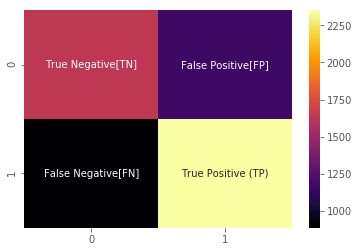

In [32]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, predictions_train)
labels = ['True Negative[TN]','False Positive[FP]','False Negative[FN]','True Positive (TP)']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap="inferno")


# Prediction using SVM

In [33]:
clf_B = SVC(random_state = 912, kernel='rbf')
train_predict(clf_B, X_train, y_train, X_test, y_test)
yb_pred = clf_B.predict(X_test)
print ('')

Training a SVC using a training set size of 6030. . .


E:\Conda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Trained model in 5.8043 seconds
Made predictions in 2.2334 seconds.
0.6165945733385765 0.6766169154228856
F1 score and accuracy score for training set[in percentage]: 61.6595 , 67.6617.
Made predictions in 0.0179 seconds.
F1 score and accuracy score for test set[in percentage]: 68.1818 , 72.0000.



# Prediction Using KNN

In [34]:
clf_C=KNeighborsClassifier()
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')
yc_pred = clf_C.predict(X_test)

Training a KNeighborsClassifier using a training set size of 6030. . .
Trained model in 0.0365 seconds
Made predictions in 3.2652 seconds.
0.70974848540481 0.7378109452736319
F1 score and accuracy score for training set[in percentage]: 70.9748 , 73.7811.
Made predictions in 0.0272 seconds.
F1 score and accuracy score for test set[in percentage]: 56.0000 , 56.0000.



# Prediction Using Decision Tree Classifier

In [35]:
clf_d=DecisionTreeClassifier()
train_predict(clf_d, X_train, y_train, X_test, y_test)
yd_pred = clf_d.predict(X_test)
print ('')

Training a DecisionTreeClassifier using a training set size of 6030. . .
Trained model in 0.1168 seconds
Made predictions in 0.0049 seconds.
0.9926746471323924 0.9932006633499171
F1 score and accuracy score for training set[in percentage]: 99.2675 , 99.3201.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set[in percentage]: 54.1667 , 56.0000.



# Prediction Using Naive Bayes

In [47]:
clf_e=GaussianNB()
train_predict(clf_e, X_train, y_train, X_test, y_test)
ye_pred = clf_e.predict(X_test)
print ('')

Training a GaussianNB using a training set size of 5472. . .
Trained model in 0.0273 seconds
Made predictions in 0.0115 seconds.
0.6335160532498042 0.6578947368421053
F1 score and accuracy score for training set[in percentage]: 63.3516 , 65.7895.
Made predictions in 0.0029 seconds.
F1 score and accuracy score for test set[in percentage]: 59.3103 , 61.1842.



# Prediction using Linear Discriminant Analysis

In [77]:
clf_f=LinearDiscriminantAnalysis()
train_predict(clf_f, X_train, y_train, X_test, y_test)
yf_pred = clf_f.predict(X_test)
print ('')

Training a LinearDiscriminantAnalysis using a training set size of 6030. . .
Trained model in 0.1699 seconds
Made predictions in 0.0029 seconds.
0.6144850999622783 0.6610281923714759
F1 score and accuracy score for training set[in percentage]: 61.4485 , 66.1028.
Made predictions in 0.0020 seconds.
F1 score and accuracy score for test set[in percentage]: 68.1818 , 72.0000.



E:\Conda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# PREDICTION USING XGBOOST

In [51]:
from xgboost import XGBRegressor
import xgboost as xgb
clf_x=xgb.XGBClassifier()
train_predict(clf_x, X_train, y_train, X_test, y_test)
yx_pred = clf_x.predict(X_test)
print ('')

Training a XGBClassifier using a training set size of 6030. . .
Trained model in 1.0205 seconds
Made predictions in 0.0401 seconds.
0.6457849961330239 0.6961857379767827
F1 score and accuracy score for training set[in percentage]: 64.5785 , 69.6186.
Made predictions in 0.0020 seconds.
F1 score and accuracy score for test set[in percentage]: 63.4146 , 70.0000.



# PREDICTION USING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_l=RandomForestRegressor()
train_predict(clf_a, X_train, y_train, X_test, y_test)
yl_pred = clf_a.predict(X_test)
print ('')

# COMPARISION OF DIFFERENT MODELS USING LINE CHARTS

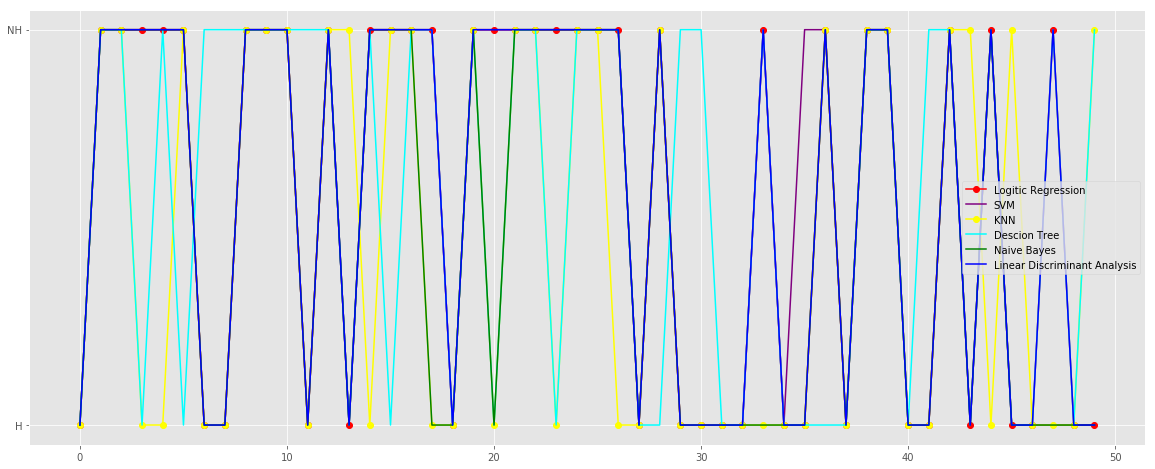

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(yA_pred,color='red',label='Logitic Regression',marker='o')
plt.plot(yb_pred,color='purple',label='SVM')
plt.plot(yc_pred,color='yellow',label='KNN',marker='o')
plt.plot(yd_pred,color='cyan',label='Descion Tree')
plt.plot(ye_pred,color='green',label='Naive Bayes')
plt.plot(yf_pred,color='blue',label='Linear Discriminant Analysis')
#plt.plot(yg_pred,color='grey',label='Random Forest')
plt.legend(loc='best')
plt.show()

# HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [80]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
             'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


E:\Conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5393034825870647, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5373134328358209, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.53681592039801, total=   2.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6577114427860696, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6512437810945274, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.655223880597015, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6587064676616915, total=   1.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6497512437810945, total=   1.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6587064676616915, total=   1.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ........

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6532338308457711, total=   1.6s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6572139303482587, total=   1.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6079601990049751, total=   3.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5840796019900497, total=   2.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5890547263681593, total=   2.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.564179104477612, total=  18.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5537313432835821, total=  15.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [81]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

print(grid.best_score_)


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.6585406301824213


In [82]:
grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           H       0.68      0.65      0.67        23
          NH       0.71      0.74      0.73        27

   micro avg       0.70      0.70      0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



# HYPERPARAMETER TUNING USING RANDOM SEARCH

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_


E:\Conda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.22685190926977272, 'penalty': 'l2'}

In [85]:
print(search.best_estimator_) 

print(search.best_score_)

LogisticRegression(C=0.22685190926977272, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='saga', tol=0.01, verbose=0, warm_start=False)
0.6595356550580431


In [86]:
search_predictions = search.predict(X_test) 

print(classification_report(y_test, search_predictions)) 

              precision    recall  f1-score   support

           H       0.71      0.65      0.68        23
          NH       0.72      0.78      0.75        27

   micro avg       0.72      0.72      0.72        50
   macro avg       0.72      0.71      0.72        50
weighted avg       0.72      0.72      0.72        50

